In [4]:
import numpy as np

JONATHAN EDUARDO TITO ONTANEDA 21/11/2025 18:22 • import significa “traer una herramienta externa al programa”.
numpy (abreviado como np) es una librería (un conjunto de herramientas) que permite trabajar con matemática avanzada, especialmente arreglos y matrices.

In [26]:
import matplotlib.pyplot as plt

In [50]:
from sklearn.neighbors import LocalOutlierFactor

In [16]:
np.random.seed(42)

El símbolo # inicia un comentario, es decir: una nota para el humano, no para la computadora.
Aquí el comentario # Generamos los datos de entrenamiento No se ejecuta. Solo explica qué se hará en las siguientes líneas de codigo

In [30]:
X_inliers = 0.3* np.random.randn(100, 2)

In [18]:
print(X_inliers)



[[ 0.14901425 -0.04147929]
 [ 0.19430656  0.45690896]
 [-0.07024601 -0.07024109]
 [ 0.47376384  0.23023042]
 [-0.14084232  0.16276801]
 [-0.13902531 -0.13971893]
 [ 0.07258868 -0.57398407]
 [-0.51747535 -0.16868626]
 [-0.30384934  0.0942742 ]
 [-0.27240722 -0.42369111]
 [ 0.43969463 -0.06773289]
 [ 0.02025846 -0.42742446]
 [-0.16331482  0.03327678]
 [-0.34529807  0.11270941]
 [-0.18019161 -0.08750812]
 [-0.18051198  0.55568346]
 [-0.00404917 -0.31731328]
 [ 0.24676347 -0.36625309]
 [ 0.06265908 -0.58790104]
 [-0.39845581  0.05905837]
 [ 0.22153997  0.05141048]
 [-0.03469448 -0.09033111]
 [-0.4435566  -0.21595326]
 [-0.13819163  0.31713667]
 [ 0.10308549 -0.52891205]
 [ 0.09722519 -0.11552468]
 [-0.2030766   0.18350289]
 [ 0.30929986  0.27938404]
 [-0.25176526 -0.09276371]
 [ 0.09937903  0.29266354]
 [-0.14375227 -0.05569769]
 [-0.33190049 -0.35886199]
 [ 0.24375775  0.40687201]
 [-0.02160304  0.30105987]
 [ 0.10849081 -0.19353593]
 [ 0.10841868  0.46141097]
 [-0.01074781  0.4693931 ]
 

In [31]:
X_inliers.shape

(100, 2)

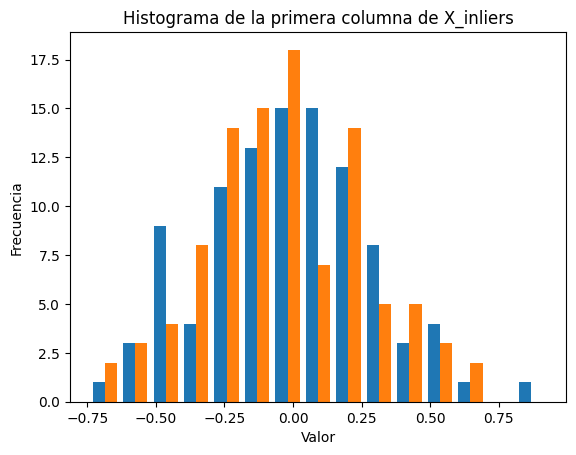

In [33]:
plt.hist(X_inliers[0:, :], bins=15)
plt.title("Histograma de la primera columna de X_inliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

21/11/2025 18:35 • np.random.randn(100,2) Es un generador de números aleatorios que siguen una distribución normal (también llamada campana de Gauss).
genera 100 filas
cada una de las filas con 2 números
los números siguen una distribución normal con media 0 y desviación estándar 1
¿Por qué hacemos 0.3 * ...? Porque queremos que los puntos estén más juntos y centrados.
Multiplicar los valores aleatorios por 0.3:
reduce su tamaño

hace que el grupo de puntos sea más compacto

evita que se dispersen demasiado en el gráfico
Antes una fila: [-1.2 0.7] Después de multiplicar x 0.3: [-0.36 0.21]. Mucho más cerca del origen.
¿Qué significa X_inliers = ...? Estamos guardando los resultados en una variable llamada X_inliers.
El nombre viene de:
inlier → punto normal, punto dentro del grupo

lo contrario de outlier, que es un punto raro o externo
X_inliers es un grupo de 100 puntos normales, cada uno con 2 coordenadas (x, y).
Estos serán los datos “buenos” o “normales” del dataset.

[[ 1.5216717   1.82018749]
 [ 2.00157311  2.01409418]
 [ 1.86498036  2.18685498]
 [ 1.67971387  1.95728615]
 [ 2.03608869  2.15433165]
 [ 2.21348446  1.66260737]
 [ 1.53976575  2.38330305]
 [ 2.0996942   1.77545404]
 [ 2.46534559  2.03470239]
 [ 2.35378916  2.02025554]
 [ 2.61822438  2.52660225]
 [ 1.92531076  2.29147129]
 [ 2.19361278  2.41058947]
 [ 1.71052296  2.20581544]
 [ 2.31752735  1.47237815]
 [ 1.64502245  1.38823035]
 [ 1.91917795  2.21526268]
 [ 2.45070712  2.02222843]
 [ 2.48858466  1.58596956]
 [ 1.48898527  1.98333569]
 [ 2.11521963  1.99019158]
 [ 1.37976737  1.97326399]
 [ 1.60865915  2.20090176]
 [ 2.10997947  1.71803606]
 [ 1.84583992  1.68223594]
 [ 1.98119627  2.2865427 ]
 [ 1.70428219  2.15121395]
 [ 1.84092271  1.76213815]
 [ 1.96789089  1.6894273 ]
 [ 1.83390521  1.64063663]
 [ 2.58941754  2.01057907]
 [ 1.79008235  2.06419397]
 [ 1.96630159  1.93370912]
 [ 2.18425001  2.22725231]
 [ 1.84084966  1.82725453]
 [ 1.91748449  1.30942365]
 [ 1.54544268  2.41006228]
 

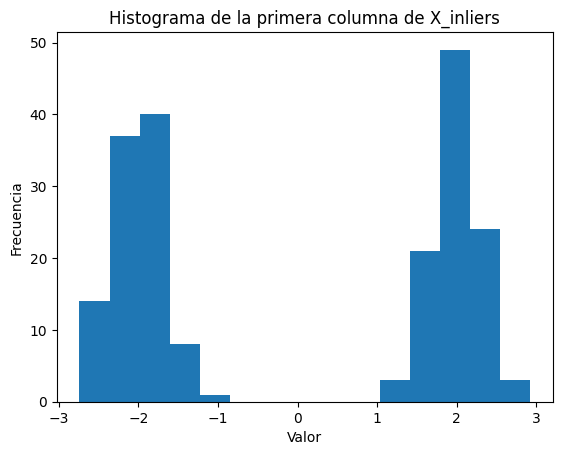

In [37]:
X_inliers2 = np.r_[X_inliers + 2, X_inliers - 2]
print(X_inliers2)

plt.hist(X_inliers2[:, 0], bins=15)
plt.title("Histograma de la primera columna de X_inliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

In [36]:
X_inliers2.shape

(200, 2)

ué es X_inliers + 2?
A cada punto del arreglo, súmale 2 a las dos coordenadas:
Si un punto era: [-0.36, 0.21]. Entonces [-0.36 + 2, 0.21 + 2] = [1.64, 2.21]
PREGUNTA AL CURSO: ¿Qué es X_inliers - 2?
RESPUESTA: ¿Qué es X_inliers - 2? [-0.36, 0.21] → [-2.36, -1.79]
¿Qué hace np.r_[ ... , ... ]?
Es una función que une dos conjuntos de datos verticalmente.
Así: [ grupo desplazado +2 ] [ grupo desplazado -2 ] Resultado: una sola matriz con 200 filas.
¿Por qué hacemos esto?
Generamos dos grupos de puntos “buenos”:
uno centrado alrededor de (2,2)
otro centrado alrededor de (-2,-2)
Estos dos grupos representarán datos normales.

[[-3.70760266 -0.22346444]
 [ 0.51872907 -3.47433088]
 [ 2.20422093 -0.37368932]
 [ 0.19512215 -0.47389802]
 [-0.79389551  0.47712265]
 [-2.75807803 -2.54457496]
 [ 2.89428497  3.5689237 ]
 [-1.01352547 -1.83404261]
 [ 1.15199635 -0.73012663]
 [-3.79690915 -2.75077922]
 [ 1.72777783  1.27139154]
 [-3.78323206 -2.2242227 ]
 [-2.15140163  1.37514195]
 [-3.8423157  -3.16713134]
 [ 2.39932868 -2.5716427 ]
 [ 1.22196886 -2.09453775]
 [-3.20446886 -2.05462247]
 [ 1.77813545  2.84557174]
 [ 2.64175892 -0.82253176]
 [ 1.34468109 -2.36012564]]


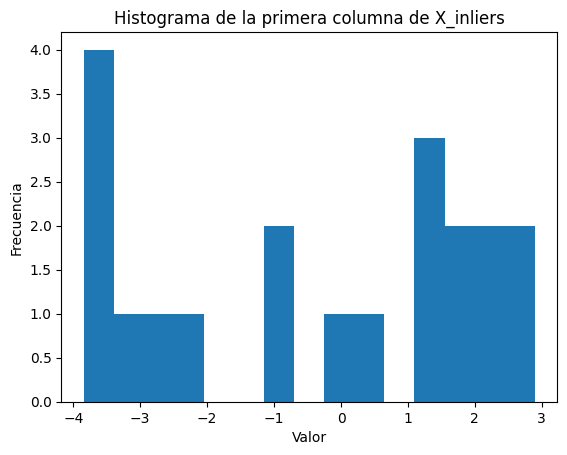

In [ ]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

print(X_outliers)

plt.hist(X_outliers[:, 0], bins=15)
plt.title("Histograma de la primera columna de X_outliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

Qué es np.random.uniform()?
Es un generador de números aleatorios que elige valores entre dos límites:
low=-4 significa el valor mínimo posible es −4
high=4 significa el valor máximo posible es 4
Es como decir:
“Elige números entre −4 y 4”.
¿Qué significa size=(20, 2)?
Vamos a generar 20 puntos, donde cada punto tiene 2 coordenadas (x, y)
Entonces crea una matriz así:
[ [valor, valor], [valor, valor], ... 20 veces ]
¿Por qué estos son outliers?
Porque estos puntos pueden caer en cualquier parte del cuadrado: x entre −4 y 4 y entre −4 y 4
Esto incluye puntos:
Lejos de los grupos normales

Totalmente dispersos

Con ubicaciones aleatorias
Son perfectos para representar “valores raros”.

In [43]:
X = np.r_[X_inliers, X_outliers]
print(X)
X.shape

[[-4.78328298e-01 -1.79812507e-01]
 [ 1.57310992e-03  1.40941781e-02]
 [-1.35019641e-01  1.86854980e-01]
 [-3.20286129e-01 -4.27138455e-02]
 [ 3.60886895e-02  1.54331650e-01]
 [ 2.13484463e-01 -3.37392628e-01]
 [-4.60234251e-01  3.83303047e-01]
 [ 9.96942036e-02 -2.24545961e-01]
 [ 4.65345593e-01  3.47023903e-02]
 [ 3.53789155e-01  2.02555444e-02]
 [ 6.18224377e-01  5.26602253e-01]
 [-7.46892445e-02  2.91471285e-01]
 [ 1.93612785e-01  4.10589467e-01]
 [-2.89477038e-01  2.05815438e-01]
 [ 3.17527346e-01 -5.27621846e-01]
 [-3.54977554e-01 -6.11769653e-01]
 [-8.08220503e-02  2.15262677e-01]
 [ 4.50707116e-01  2.22284341e-02]
 [ 4.88584664e-01 -4.14030437e-01]
 [-5.11014732e-01 -1.66643097e-02]
 [ 1.15219635e-01 -9.80842443e-03]
 [-6.20232630e-01 -2.67360119e-02]
 [-3.91340850e-01  2.00901765e-01]
 [ 1.09979474e-01 -2.81963936e-01]
 [-1.54160075e-01 -3.17764057e-01]
 [-1.88037292e-02  2.86542696e-01]
 [-2.95717814e-01  1.51213955e-01]
 [-1.59077286e-01 -2.37861850e-01]
 [-3.21091080e-02 -3

(120, 2)

In [44]:
n_outliers = len(X_outliers)
print(n_outliers)

20


In [ ]:
ground_truth = np.ones(len(X), dtype=int)
print(ground_truth)
ground_truth.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


(120,)

In [48]:
ground_truth[-n_outliers:] = -1

print(ground_truth)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [51]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

print(clf)

LocalOutlierFactor(contamination=0.1)


In [53]:
#Usaremos fit_predict para obtener las etiquetas (normal o outlier).
#LOF no permite predecir sobre datos nuevos cuando se usa como detector de outliers.
#LOF estudia densidades locales del conjunto completo
#Si le damos un nuevo punto, no sabe dónde encajarlo
#Para eso existe un modo especial llamado novelty=True (pero aquí no lo usaremos)
y_pred = clf.fit_predict(X)

print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1]


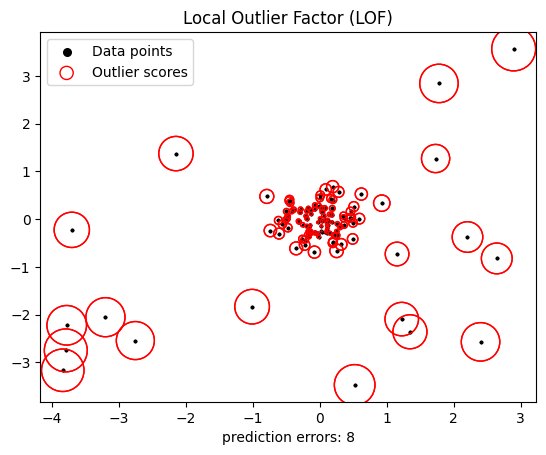

In [54]:
n_errors = (y_pred != ground_truth).sum()

X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')
sc_points

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())


sc_circles = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
sc_circles


plt.title("Local Outlier Factor (LOF)")


sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    label='Data points'
)


radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)


plt.autoscale()

plt.xlabel(f"prediction errors: {n_errors}")


leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')

leg.legend_handles[0].set_sizes([30])
leg.legend_handles[1].set_sizes([90])

plt.show()

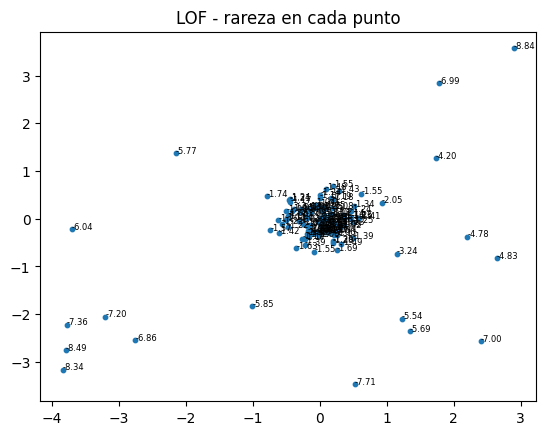

In [55]:
plt.figure()

# Puntos
plt.scatter(X[:, 0], X[:, 1], s=10)

# Texto con el score en cada punto
for x, y, score in zip(X[:, 0], X[:, 1], X_scores):
    plt.text(x, y, f"{score:.2f}", fontsize=6)

plt.title("LOF - rareza en cada punto")
plt.show()
